# Potential Field

In this notebook you'll create a potential field by implementing and combining attractive and replusive forces. We can use the potential field to move in a direction closer to the goal (attraction) while avoiding obstacles (repulsion).

Recall from lecture that the attractive potential is:

$$F_{att} = \alpha * (x - x_{goal})$$

and repulsive potential, which is only computed when $d(x - x_{obs}) < Q_{max}$:

$$F_{rep} = \beta * (\frac{1}{Q_{max}} - \frac{1}{d(x - x_{obs})}) * \frac{1}{d(x - x_{obs})^2}$$

where $x_{goal}$ is the goal location, $x_{obs}$ is the obstacle location and $d(...)$ is the distance metric.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
plt.rcParams['figure.figsize'] = 12, 12

### Forces are vectors

The functions `attraction` and `repulsion` are expected to return vectors capable of memberwise arithmetic, so return `np.array` objects.

In [3]:
# NOTE: If unit vector is computed, the field will be 
#       uniform. According to the lecture, the field
#       has to be stronger the farther away from the
#       goal. So, do not normalize.
def attraction(position, goal, alpha):
    goal_vector = np.array(goal) - np.array(position)  # point toward the goal!
    d = np.linalg.norm(goal_vector)
    if alpha == 0 or d == 0:
        return [0, 0]  # no attractive force at goal
    return alpha * goal_vector

In [4]:
# NOTE: Caller should check for d < q_max
# NOTE: Normalization, as with attraction, causes
#       the field to be strongly enough repulsive
#       only too close to the obstacle.
def repulsion(position, obstacle, beta, q_max):
    obstacle_vector = np.array(obstacle) - np.array(position)  # this points toward obstacle
    d = np.linalg.norm(obstacle_vector)
    if beta == 0 or d == 0:
        return [0, 0]  # no field inside obstacle
    F_coeff = beta * (1/q_max - 1/d) / d**2  # this is negative, since d < q_max
    return F_coeff * obstacle_vector

Below we'll generate the potential field. For the purposes of the visualization we'll compute the field for the entire environment. Generally you'll only want to compute the field within a range around the current position for use in local planning.

In [5]:
def potential_field(grid, goal, alpha, beta, q_max):
    x = []
    y = []
    fx = []
    fy = []
    
    obs_i, obs_j = np.where(grid == 1)

    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] == 0:
                
                # add attraction force
                force = attraction([i, j], goal, alpha)

                for (oi, oj) in zip(obs_i, obs_j):
                    if np.linalg.norm(np.array([i, j]) - np.array([oi, oj])) < q_max:
                        # add replusion force
                        force += repulsion([i, j], [oi, oj], beta, q_max)
                    
                x.append(i)
                y.append(j)
                fx.append(force[0])
                fy.append(force[1])

    return x, y, fx, fy

In [6]:
# generate environment
grid = np.zeros((30, 30))
grid[10:15,10:15] = 1.0
grid[17:25,10:17] = 1.0

goal  = [5, 5]

# constants
# TODO: repulsion doesn't seem to be functioning
alpha = 1.0
beta = 10.0
q_max = 10

Generating the potential field.

In [7]:
x, y, fx, fy = potential_field(grid, goal, alpha, beta, q_max)

Plotting the field. 

**NOTE:** `np.array` supports memberwise arithmetic, but pure Python lists do not! :D

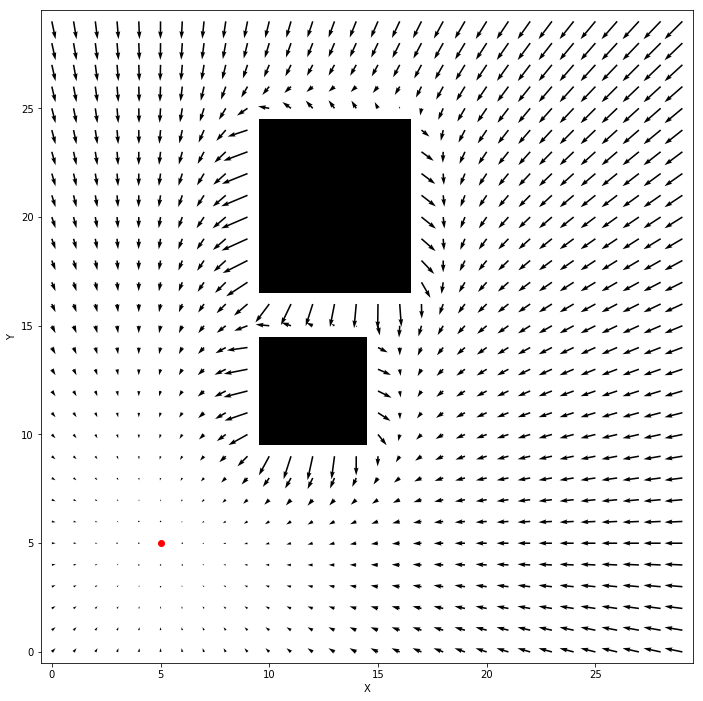

In [8]:
plt.imshow(grid, cmap = 'Greys', origin='lower')
plt.plot(goal[1], goal[0], 'ro')
plt.quiver(y, x, fy, fx)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

[Solution](./Potential-Field-Solution.ipynb)

## Final notes

1. Original potential field shown in the notebook, which makes no sense.  

<img src="potential-field-original.png" width="600"/>  

2. The solution also doesn't make sense.  
3. An Udacity [discussion](https://knowledge.udacity.com/questions/94280) that contains good intuitively-correct guidance from students (and only links from "mentors").  
4. The raw distances should matter, so the force should not be of the form $|F| * \vec{o}$, that is, _force magnitude_ multiplied by a _unit vector_ in the proper direction.  The vector $goal - position$ or $obstacle - position$ should **not** be normalized. This causes a uniform field independent of distance to goal or obstacle, which is not what is desired.